In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 7278-8881

 Directory of c:\Users\ozan-\OneDrive\Masa�st�\maas_anketi

06.08.2023  13:55    <DIR>          .
06.08.2023  13:55    <DIR>          ..
06.08.2023  13:55           803.147 2023_II_-_Yaz�l�m_Sekt�r�_M2023-08-05_11_01_23.csv
12.08.2023  16:58         1.160.008 maas_anketi_analiz.ipynb
               2 File(s)      1.963.155 bytes
               2 Dir(s)  19.237.715.968 bytes free


In [42]:
x=pd.read_csv("2023_II_-_Yazılım_Sektörü_M2023-08-05_11_01_23.csv")

In [43]:
x

,Submission Date,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,Kazancınız hangi para biriminde?,Maaş tipi,Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?,Maaş / Aylık Türk Lirası cinsinden
0,"Ağu 5, 2023",Erkek,Yemek kartı\nYol / yakıt yardımı\nPersonel ser...,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",Türk Lirası,Net,%21-%35,70.001 TL - 85.000 TL
1,"Ağu 5, 2023",Erkek,Yemek kartı\nTamamlayıcı sağlık sigortası\nBel...,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,Türk Lirası,Net,%11-%20,20.001 TL - 25.000 TL
2,"Ağu 5, 2023",Erkek,Yemek kartı\nPersonel servisi,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",Türk Lirası,Net,%21-%35,11.402 TL ve altı
3,"Ağu 5, 2023",Erkek,"Belirli günlerde izin(doğum günü, regl izni gibi)",Türkiye,60 Tokat,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,Türk Lirası,Net,%36-%50,25.001 TL - 30.000 TL
4,"Ağu 5, 2023",Kadın,Yemek kartı,Türkiye,16 Bursa,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,Türk Lirası,Net,%21-%35,30.001 TL - 37.000 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,"Ağu 4, 2023",Erkek,Tamamlayıcı sağlık sigortası,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework,Türk Lirası,Net,%11-%20,25.001 TL - 30.000 TL
2461,"Ağu 4, 2023",Erkek,Eğitim ödemeleri\nTıbbi izin,Yurt dışı,NaN,Remote,151-300,Fullstack Developer / Engineer,Senior,9-12 Yıl,Javascript / Typescript ve bağlı framework'ler...,Euro,Brüt,NaN,130.001 TL - 160.000 TL
2462,"Ağu 4, 2023",Erkek,Yemek kartı\nYol / yakıt yardımı\nŞirket aracı...,Türkiye,34 İstanbul,Remote,1-50,Mobile Developer(Cross Platform),Mid,1-3 Yıl,"Cloud araçları ( AWS, Azure, GCP vs)\nFigma / ...",Euro,Net,%5-%10,70.001 TL - 85.000 TL
2463,"Ağu 4, 2023",Erkek,Tamamlayıcı sağlık sigortası,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework,Türk Lirası,Net,%11-%20,25.001 TL - 30.000 TL


In [44]:
x.drop(columns="Submission Date", inplace=True)
x['Yan haklarınız']= [len(i)/35.9 for i in x['Yan haklarınız']]
x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)'] = np.where(
    (x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)'] != '34 İstanbul') &
    (x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)'] != '35 İzmir') &
    (x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)'] != '06 Ankara'),
    'Diğer',
    x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)']
)

In [45]:
x

,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,Kazancınız hangi para biriminde?,Maaş tipi,Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?,Maaş / Aylık Türk Lirası cinsinden
0,Erkek,3.537604,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",Türk Lirası,Net,%21-%35,70.001 TL - 85.000 TL
1,Erkek,2.506964,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,Türk Lirası,Net,%11-%20,20.001 TL - 25.000 TL
2,Erkek,0.779944,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",Türk Lirası,Net,%21-%35,11.402 TL ve altı
3,Erkek,1.364903,Türkiye,Diğer,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,Türk Lirası,Net,%36-%50,25.001 TL - 30.000 TL
4,Kadın,0.306407,Türkiye,Diğer,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,Türk Lirası,Net,%21-%35,30.001 TL - 37.000 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework,Türk Lirası,Net,%11-%20,25.001 TL - 30.000 TL
2461,Erkek,0.752089,Yurt dışı,Diğer,Remote,151-300,Fullstack Developer / Engineer,Senior,9-12 Yıl,Javascript / Typescript ve bağlı framework'ler...,Euro,Brüt,NaN,130.001 TL - 160.000 TL
2462,Erkek,4.373259,Türkiye,34 İstanbul,Remote,1-50,Mobile Developer(Cross Platform),Mid,1-3 Yıl,"Cloud araçları ( AWS, Azure, GCP vs)\nFigma / ...",Euro,Net,%5-%10,70.001 TL - 85.000 TL
2463,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework,Türk Lirası,Net,%11-%20,25.001 TL - 30.000 TL


In [46]:
x.Cinsiyet.unique()

array(['Erkek', 'Kadın', 'Belirtmek İstemiyorum'], dtype=object)

In [47]:
x['Şirketiniz hangi lokasyon merkezli?'].value_counts()

Türkiye      2110
Yurt dışı     355
Name: Şirketiniz hangi lokasyon merkezli?, dtype: int64

In [48]:
x['Şirketiniz hangi şehirde? (Eğer Türkiye ise)'].unique()

array(['34 İstanbul', 'Diğer', '35 İzmir', '06 Ankara'], dtype=object)

In [49]:
x['Şirketinizin çalışan sayısı nedir?'].value_counts()

1-50               789
1.000-5.000        374
51-150             355
10.000 ve üzeri    252
151-300            249
301-600            213
601-1.000          119
5.000-10.000       105
Name: Şirketinizin çalışan sayısı nedir?, dtype: int64

In [50]:
x['Hangi pozisyonda çalışıyorsunuz?'].value_counts()

Backend Developer / Engineer        445
Fullstack Developer / Engineer      370
Frontend Developer / Engineer       280
Software Engineer                   217
Mobile Developer(Cross Platform)     64
                                   ... 
Data Storage Engineer                 1
Cloud Architect                       1
Instructor                            1
Power Platform Developer              1
Salesforce Consultant                 1
Name: Hangi pozisyonda çalışıyorsunuz?, Length: 67, dtype: int64

In [51]:
x.drop(columns='Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?',inplace=True)
x.drop(columns='Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?',inplace=True)
for i,j in zip(x['Maaş / Aylık Türk Lirası cinsinden'].str.split(" "), range(0,2465)):
    x['Maaş / Aylık Türk Lirası cinsinden'][j]=i[0]
x['Maaş / Aylık Türk Lirası cinsinden']=x['Maaş / Aylık Türk Lirası cinsinden'].str.replace(".","").astype(int)
x=x.rename(columns={'Hangi pozisyonda çalışıyorsunuz?':'Pozisyon','Seviyeniz nedir?':'Seviye','Maaş / Aylık Türk Lirası cinsinden':'Maaş'})

C:\Users\ozan-\AppData\Local\Temp\ipykernel_1964\2333976988.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ozan-\AppData\Local\Temp\ipykernel_1964\2333976988.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [52]:
x

,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Pozisyon,Seviye,Deneyim,Kazancınız hangi para biriminde?,Maaş tipi,Maaş
0,Erkek,3.537604,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,Türk Lirası,Net,70001
1,Erkek,2.506964,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Türk Lirası,Net,20001
2,Erkek,0.779944,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,Türk Lirası,Net,11402
3,Erkek,1.364903,Türkiye,Diğer,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Türk Lirası,Net,25001
4,Kadın,0.306407,Türkiye,Diğer,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,30001
...,...,...,...,...,...,...,...,...,...,...,...,...
2460,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,25001
2461,Erkek,0.752089,Yurt dışı,Diğer,Remote,151-300,Fullstack Developer / Engineer,Senior,9-12 Yıl,Euro,Brüt,130001
2462,Erkek,4.373259,Türkiye,34 İstanbul,Remote,1-50,Mobile Developer(Cross Platform),Mid,1-3 Yıl,Euro,Net,70001
2463,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,25001


In [53]:
x.isna().sum()

Cinsiyet                                        0
Yan haklarınız                                  0
Şirketiniz hangi lokasyon merkezli?             0
Şirketiniz hangi şehirde? (Eğer Türkiye ise)    0
Çalışma şekliniz nedir?                         0
Şirketinizin çalışan sayısı nedir?              9
Pozisyon                                        0
Seviye                                          0
Deneyim                                         0
Kazancınız hangi para biriminde?                0
Maaş tipi                                       0
Maaş                                            0
dtype: int64

In [54]:
x.dropna()

,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Pozisyon,Seviye,Deneyim,Kazancınız hangi para biriminde?,Maaş tipi,Maaş
0,Erkek,3.537604,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,Türk Lirası,Net,70001
1,Erkek,2.506964,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Türk Lirası,Net,20001
2,Erkek,0.779944,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,Türk Lirası,Net,11402
3,Erkek,1.364903,Türkiye,Diğer,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Türk Lirası,Net,25001
4,Kadın,0.306407,Türkiye,Diğer,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,30001
...,...,...,...,...,...,...,...,...,...,...,...,...
2460,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,25001
2461,Erkek,0.752089,Yurt dışı,Diğer,Remote,151-300,Fullstack Developer / Engineer,Senior,9-12 Yıl,Euro,Brüt,130001
2462,Erkek,4.373259,Türkiye,34 İstanbul,Remote,1-50,Mobile Developer(Cross Platform),Mid,1-3 Yıl,Euro,Net,70001
2463,Erkek,0.779944,Türkiye,34 İstanbul,Remote,1.000-5.000,Backend Developer / Engineer,Senior,3-5 Yıl,Türk Lirası,Net,25001


In [55]:
# Outlier
fig = px.box(x, x='Seviye', y="Maaş")
fig.show()

In [56]:
x=x[(x['Maaş']>x['Maaş'].quantile(0.15)) & (x['Maaş']<x['Maaş'].quantile(0.85))]

In [57]:
# z score method from remove outliers
# z_scores=stat.zscore(x['Maaş'])
# data = np.abs(z_scores) < 2
# cleaned_x = x[data]
# x=cleaned_x 

In [58]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# ToggleButtons widget oluşturma
position_toggle = widgets.ToggleButtons(
    options=x['Pozisyon'].unique(),
    description='Pozisyon:',
    button_style='',  # Buton stilini özelleştirmek için
)

def update_plot(change):
    selected_position = change.new
    filtered_data = x[x['Pozisyon'] == selected_position]
    
    with graph_output:
        clear_output(wait=True)
        fig = px.box(filtered_data, x='Seviye', y='Maaş', points='all')
        fig.update_layout(
            title=f"Maaş Dağılımı - Pozisyon: {selected_position}",
            xaxis_title="Seviye",
            yaxis_title="Maaş"
        )
        fig.show()

def display_graph_output():
    display(graph_output)
    display(position_toggle)

position_toggle.observe(update_plot, names='value')

graph_output = widgets.Output()

display_graph_output()


Output()

ToggleButtons(description='Pozisyon:', options=('Fullstack Developer / Engineer', 'Backend Developer / Enginee…

In [59]:
Sfig = px.box(x, x='Seviye', y="Maaş")
fig.show()

In [60]:
last=x[['Maaş','Seviye', 'Pozisyon']]

In [61]:
ozet1=last.groupby(['Pozisyon','Seviye']).mean()

In [62]:
ozet1

Maaş
Pozisyon                     Seviye              
3D Artist                    Mid     32501.000000
ABAP Consultant              Junior  40667.666667
                             Mid     45001.000000
                             Senior  30001.000000
AI - ML Developer / Engineer Junior  33143.857143
...                                           ...
UI/UX Designer               Mid     33401.000000
                             Senior  42429.571429
iOS Developer                Junior  28261.869565
                             Mid     43358.142857
                             Senior  47126.000000

[131 rows x 1 columns]

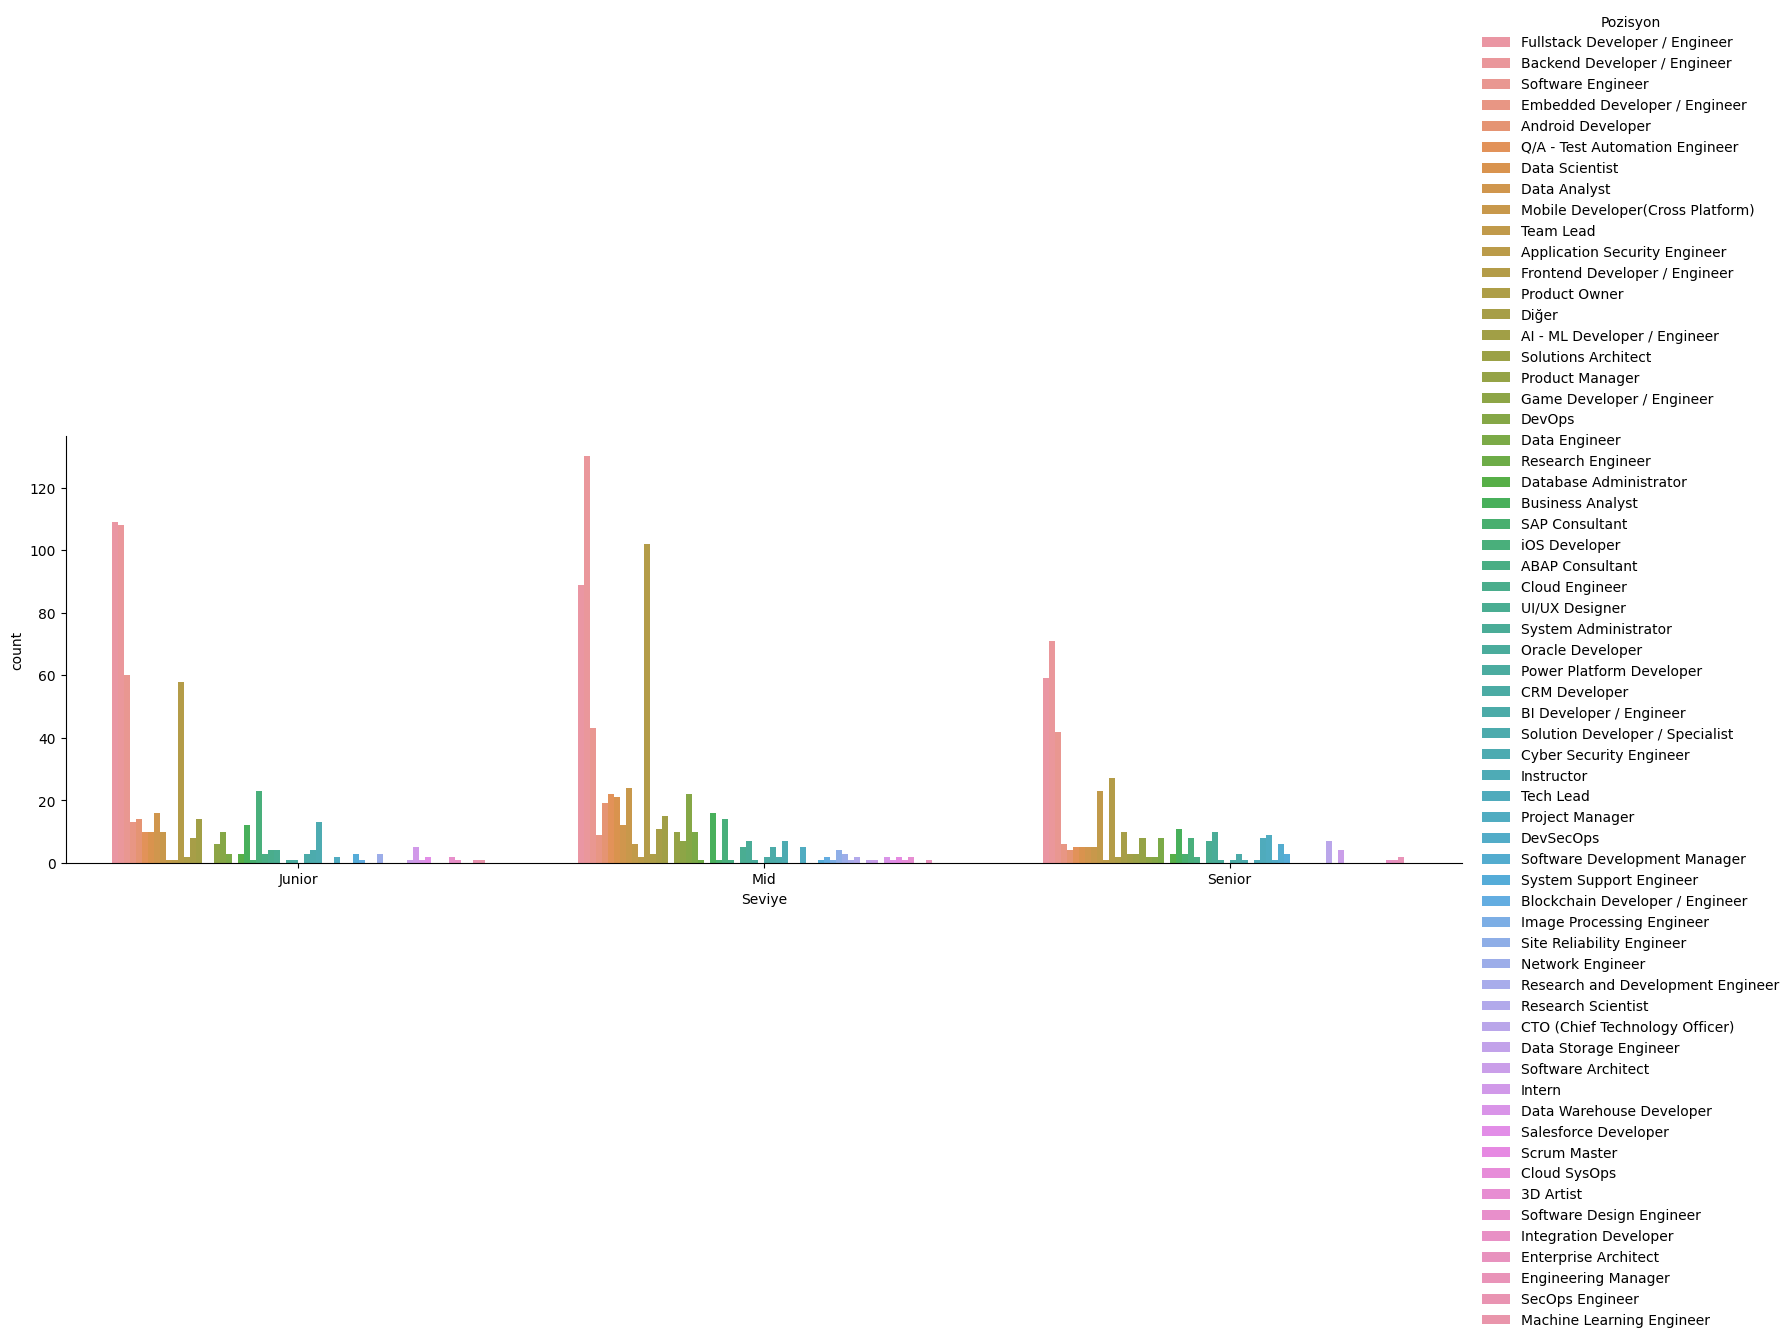

In [63]:
sns.catplot(x="Seviye",kind="count",data=last,hue="Pozisyon",aspect=3)

In [64]:
ozet2=last.groupby(['Pozisyon','Maaş']).count()

In [65]:
ozet2

Seviye
Pozisyon        Maaş         
3D Artist       20001       1
                45001       1
ABAP Consultant 30001       3
                37001       1
                45001       1
...                       ...
iOS Developer   25001       9
                30001       8
                37001       7
                45001       7
                55001       9

[232 rows x 1 columns]

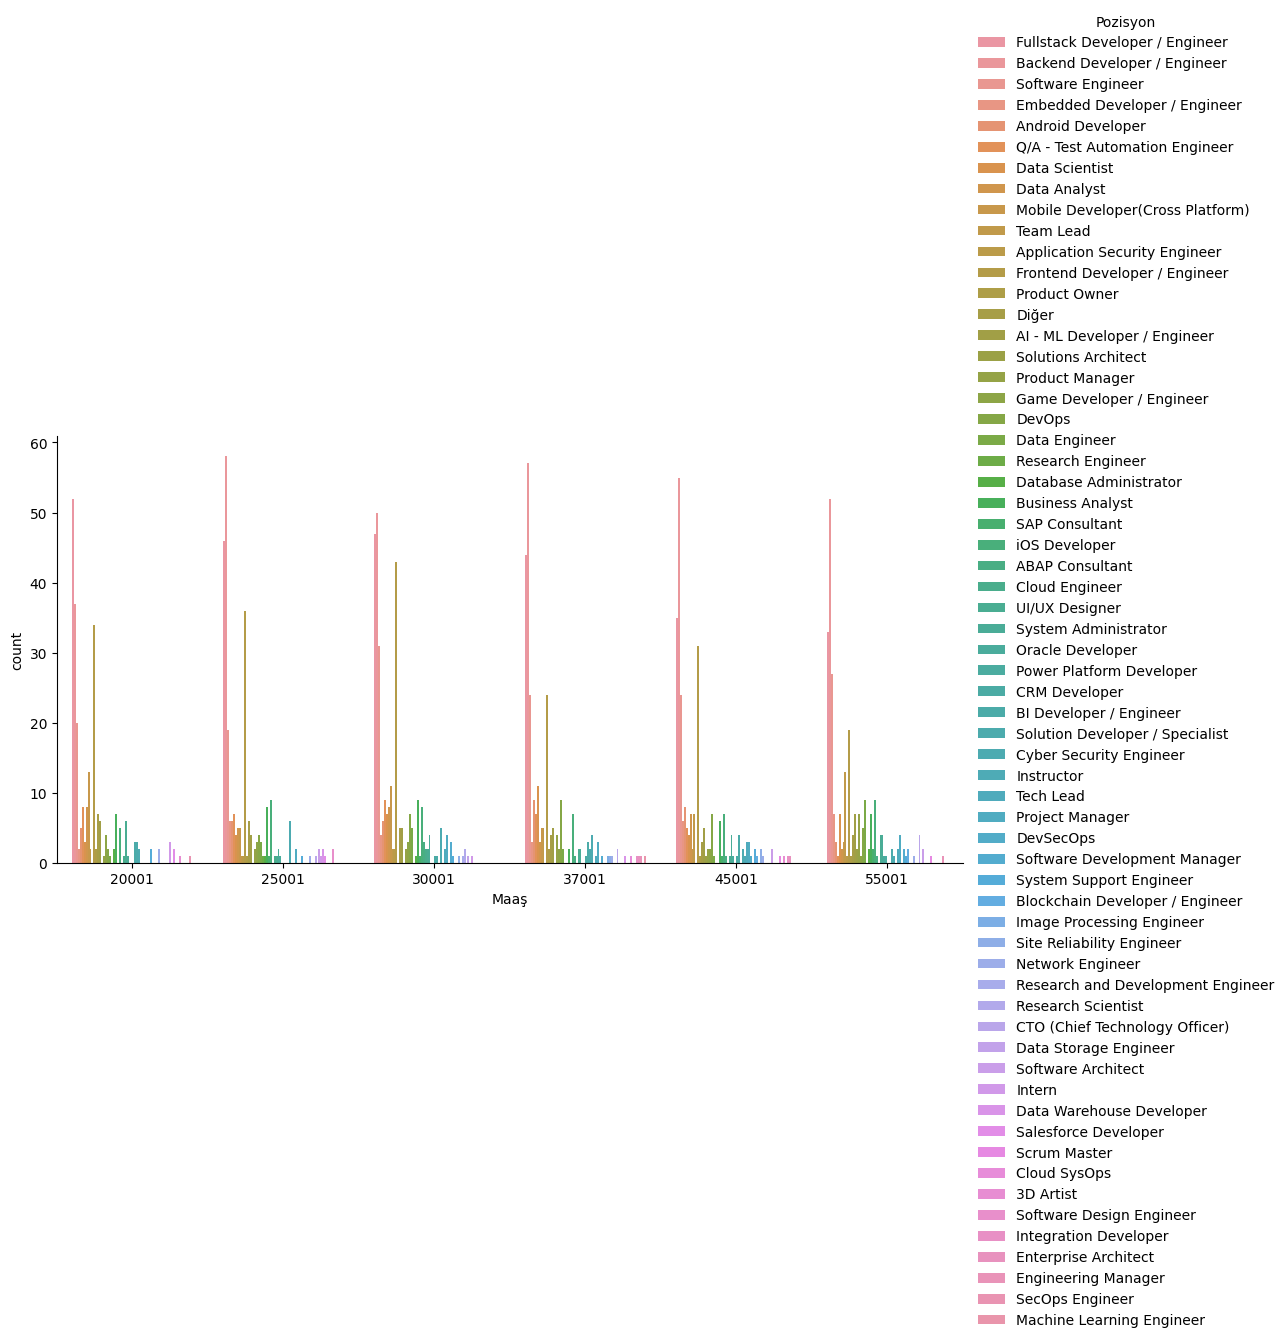

In [66]:
sns.catplot(x="Maaş",kind="count",data=last,hue="Pozisyon",aspect=2)

In [67]:
ozet3=last.groupby('Seviye').mean()

C:\Users\ozan-\AppData\Local\Temp\ipykernel_1964\4086072243.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [68]:
ozet3

,Maaş
Seviye,
Junior,28203.554745
Mid,35518.719569
Senior,44842.145833


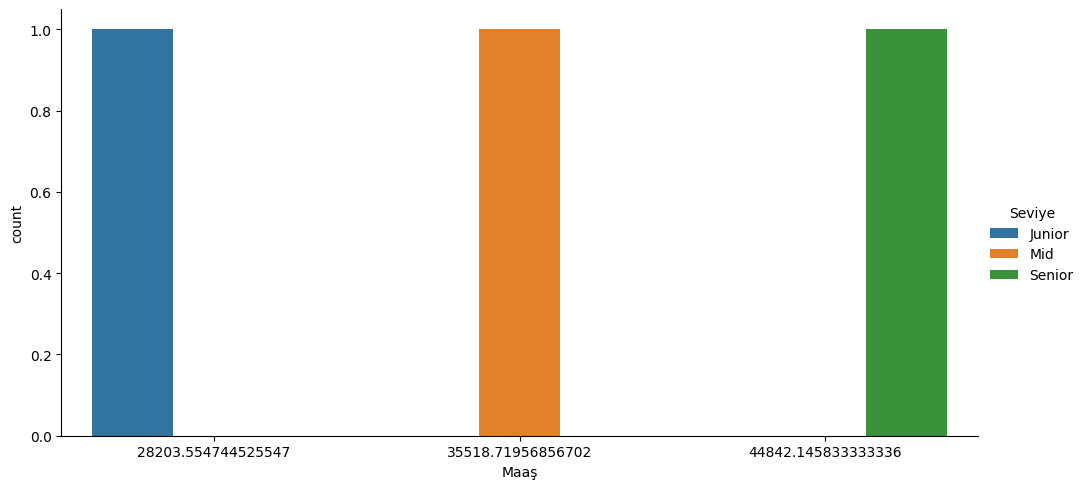

In [69]:
sns.catplot(x="Maaş",kind="count",data=ozet3.reset_index(),hue="Seviye",aspect=2)

In [70]:
ozet4=x.groupby(['Seviye']).agg(np.median).sort_values('Maaş')

C:\Users\ozan-\AppData\Local\Temp\ipykernel_1964\3832383571.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [71]:
ozet4

,Yan haklarınız,Maaş
Seviye,,
Junior,1.866295,25001.0
Mid,1.671309,37001.0
Senior,1.671309,45001.0


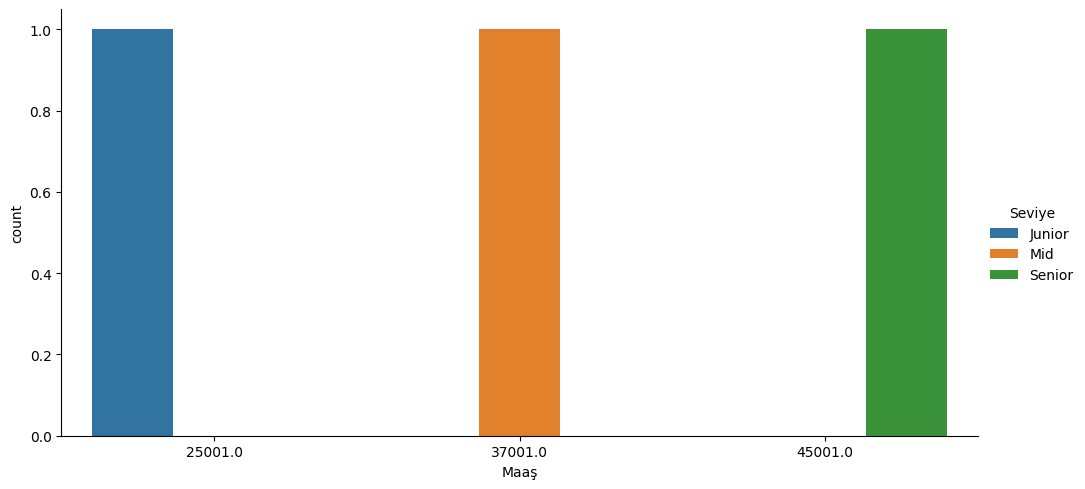

In [72]:
sns.catplot(x="Maaş",kind="count",data=ozet4.reset_index(),hue="Seviye",aspect=2)

In [73]:
last.groupby(['Seviye','Maaş']).count()

Pozisyon
Seviye Maaş           
Junior 20001       159
       25001       155
       30001       124
       37001        55
       45001        38
       55001        17
Mid    20001        78
       25001        90
       30001       136
       37001       148
       45001       115
       55001        82
Senior 20001        11
       25001        16
       30001        40
       37001        57
       45001       101
       55001       159

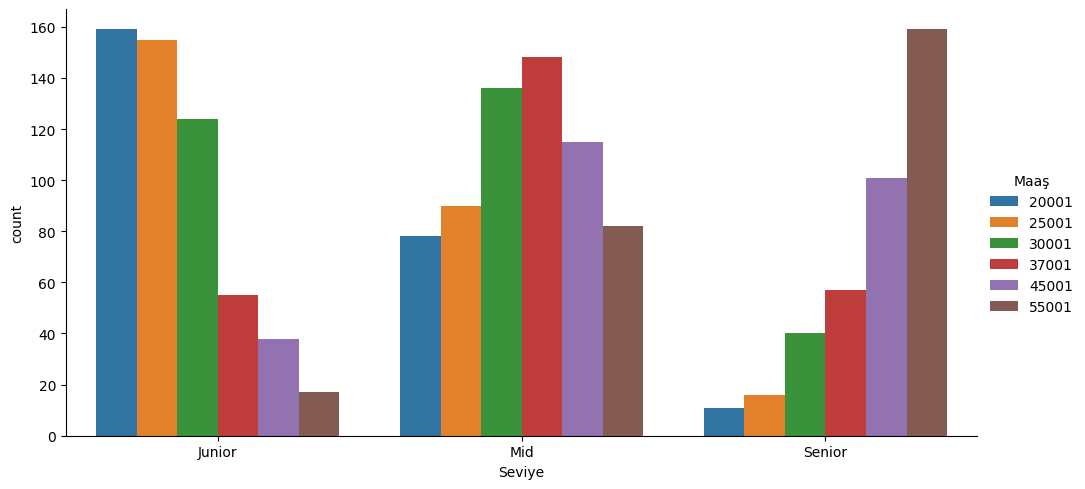

In [74]:
sns.catplot(x="Seviye",kind="count",data=last,hue="Maaş",aspect=2)

In [75]:
visu=x[['Maaş','Seviye', 'Deneyim']]

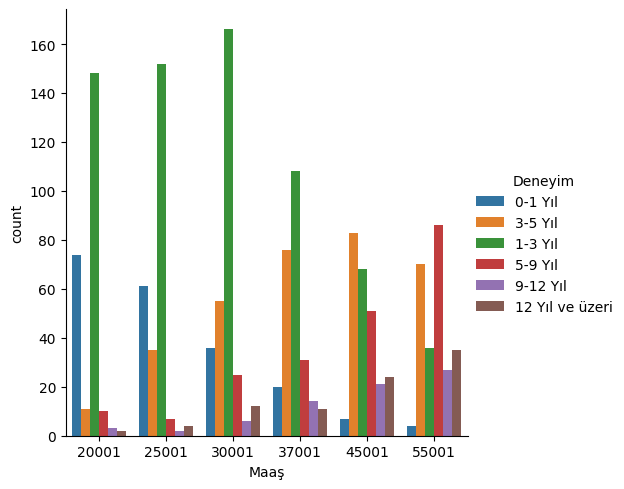

In [76]:
sns.catplot(x="Maaş",hue="Deneyim",kind="count",data=visu)

In [77]:
analysis=x.groupby(['Pozisyon','Seviye','Maaş']).count()[['Maaş tipi']].reset_index().rename(columns={'Maaş tipi':'Count'})
analysis['pose']=analysis['Pozisyon']+analysis['Seviye']
junior=analysis[analysis['Seviye']=='Junior']

In [78]:
px.bar(analysis,y='pose',x='Count',color="Maaş",barmode="overlay")

In [79]:
px.bar(junior,y='pose',x='Count',color="Maaş",barmode="overlay")  

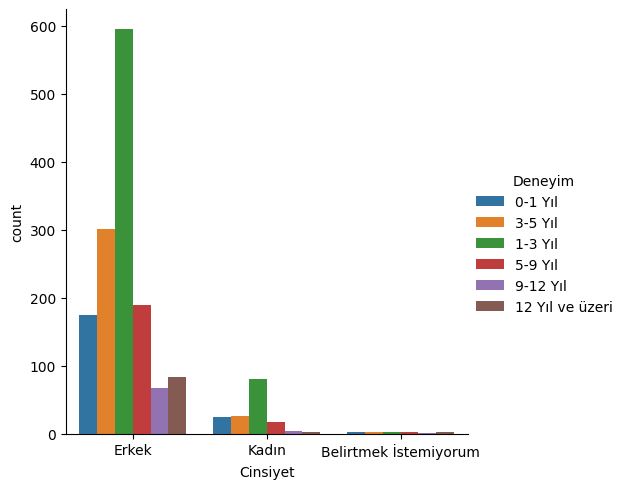

In [80]:
sns.catplot(x="Cinsiyet",hue="Deneyim",kind="count",data=x)

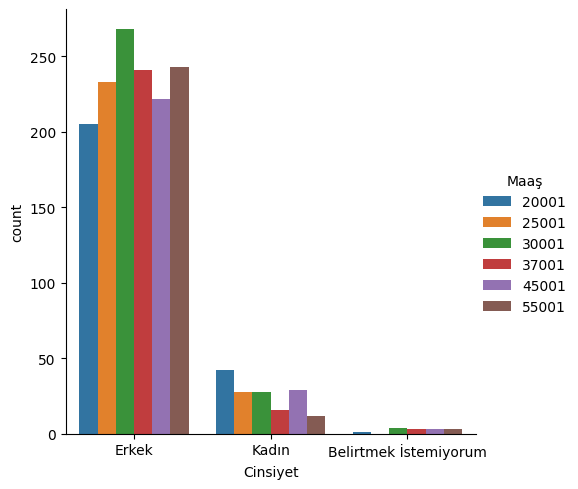

In [81]:
sns.catplot(x="Cinsiyet",hue="Maaş",kind="count",data=x)